# Regresión lineal

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)
X.shape, y.shape

((20640, 8), (20640,))

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

**Los modelos son clases**
- `.fit` - ajusta sobre el dato de entrenamiento
- `.predict`- realiza predicciones sobre dato nuevo

In [12]:
model = LinearRegression()

In [13]:
model.fit(X, y)

LinearRegression()

In [14]:
model.coef_, model.intercept_

(array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
        -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01]),
 -36.94192020718435)

In [15]:
X.iloc[0:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [16]:
model.predict(X.iloc[0:2])

array([4.13164983, 3.97660644])

In [35]:
coefs = pd.Series(model.coef_, index=X.columns)
coefs.sort_values(ascending=False, inplace=True)
coefs

AveBedrms     0.645066
MedInc        0.436693
HouseAge      0.009436
Population   -0.000004
AveOccup     -0.003787
AveRooms     -0.107322
Latitude     -0.421314
Longitude    -0.434514
dtype: float64

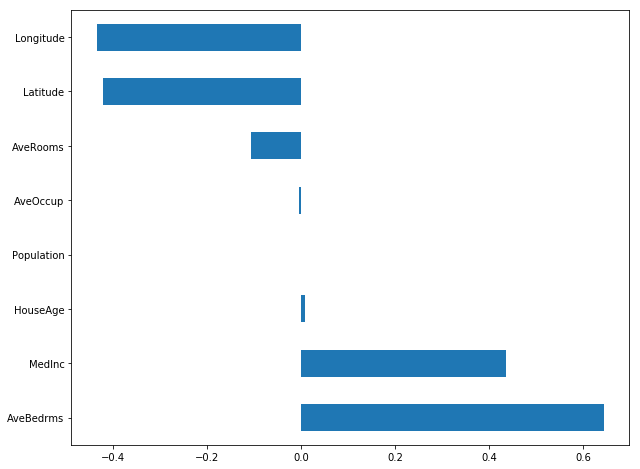

In [37]:
%matplotlib inline
coefs.plot.barh(figsize=(10, 8));

In [38]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X)
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(0.5311643817546476, 0.5243209861846072)

In [41]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [42]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.606232685199805